# Activity 5.1: Clustering

#### Objective:

This activity aims to perform classification  of unlabeled data using K Means and Agglomerative Clustering

#### Intended Learning Outcomes (ILOs):
* Build the model using K Means and Agglomerative clustering.
* Determine the optimum number of clusters using elbow method.
* Visualize the dendogram produced by the agglomerative clustering


#### Resources:
* Jupyter Notebook
* Wholesale customers data.csv

#### Procedure:

We will used K-Means clustering to cluster the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc.


Import the needed libraries

In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

Load the dataset and check the first five rows

In [3]:
filepath =  '/content/drive/My Drive/Colab Notebooks/Datasets/Wholesale_Customers_Data.csv'

In [4]:
df=pd.read_csv(filepath, sep=',')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Check the descriptive statistics of the dataset

In [5]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Since K-Means is a distance-based algorithm, the difference between the magnitudes of the data will create a problem. Let us apply featuring scaling to standardize the data.

In [6]:
# Use standard scaler to standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.400000e+02,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,1.614870e-17,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-6.902971e-01,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-6.902971e-01,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,-6.902971e-01,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,1.448652e+00,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,1.448652e+00,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


Build the K-Means model

In [7]:
# Create cluster of 2
kmeans = KMeans(n_clusters=2, init='k-means++')

# fit the k means algorithm on scaled data
kmeans.fit(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

 Calculate the inertia to evaluate how well the formed clusters are. 

In [8]:
# inertia on the fitted data
kmeans.inertia_

2599.3855593561393


Interpret the result of the inertia

The value you obtained (2599.3855593561393) tells us how far the data points in the 2 clusters are. The lower the inertia value, the better our model has done at grouping the data. In other words, lower inertia values mean the data points in the same cluster are closer to each other.

Use the elbow curve to determine the optimum number of clusters in Python.



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

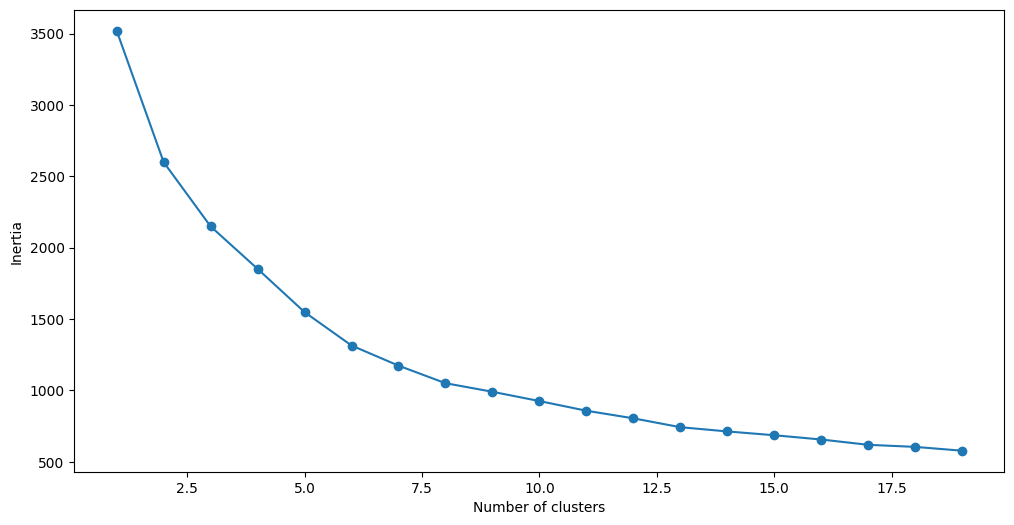

In [10]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [37]:
# K-Means Clustering
clust_df = df.copy()
#clust_df['Gender'] = [1 if i == "Women" else 0 for i in clust_df.Gender]

k_means = list()
for clust in range(1,20):
    km = KMeans(n_clusters=clust, init='k-means++', random_state=42).fit(clust_df)
    k_means.append(pd.Series({'Clusters': clust, 
                              'Inertia': km.inertia_,
                              'model': km}))

# Plot results
plot_km = (pd.concat(k_means, axis=1).T
           [['Clusters','Inertia']]
           .set_index('Clusters'))

fig = px.line(plot_km, x=plot_km.index, y='Inertia', markers=True)
fig.add_vline(x=5, line_width=3, line_dash="dash", line_color="darkgrey")
fig.add_annotation(
    xref="x domain",
    yref="y",
    x=.31,
    y=75e3,
    text="Optimal Number of Clusters",
    axref="x domain",
    ayref="y",
    ax=.43,
    ay=12e4,
    arrowhead=2, 
    bordercolor="#585858",
    borderpad=4, 
    bgcolor='white',
    font=dict(size=14)
)
fig.update_traces(line_color='#518C89')
fig.update_layout(template=temp, title="K-Means Clustering Elbow Curve", 
                  xaxis=dict(tickmode = 'linear', showline=True), yaxis=dict(showline=True), width=700)
fig.show()

Interpret the result of the elbow curve. 

Inertia is highest at 2 clusters. Based on the graph, better to use 5.

Build a model using 5 clusters and k-means ++ initialization

In [12]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [13]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    211
0    126
2     91
3     10
4      2
Name: cluster, dtype: int64

There are 211 data points belonging to cluster 1 (index 1), then 126 points in cluster 2 (index 2), and so on.

Compute the centroids of the K means cluster

In [14]:
centroids = kmeans.cluster_centers_
print(centroids)

[[ 1.44865163e+00  1.69928497e-01 -3.14722179e-01  4.52466342e-01
   6.66146634e-01 -3.51066687e-01  6.83203927e-01  4.65876480e-02]
 [-6.80159888e-01  5.90668285e-01  1.49701883e-01 -3.38970651e-01
  -4.35787592e-01  8.62596306e-02 -4.39578802e-01 -7.92402039e-02]
 [-5.72772431e-01 -1.59749436e+00  1.45371704e-02 -3.44758082e-01
  -4.02466315e-01  7.96677044e-02 -4.24411072e-01 -1.33102511e-01]
 [ 1.44865163e+00 -5.58343155e-02  3.13830315e-01  3.92190593e+00
   4.27561037e+00 -3.57419457e-03  4.61816580e+00  5.03365339e-01]
 [-6.90297086e-01 -5.58343155e-02  1.80335587e+00  3.33298726e+00
   9.42518505e-01  9.40980070e+00 -4.46409015e-01  8.96415723e+00]]


What is the purpose of the centroids?

In the context of K-means clustering, a centroid is the center of a cluster. Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares, which means each data point is closer to its own cluster center than to other cluster centers. In other words, the centroids are the means of all the data points that belong to that cluster.

Fit an agglomerative clustering model with two clusters.

In [15]:
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=2, linkage='ward', compute_full_tree=True)
ag = ag.fit(data_scaled)
df['agglom'] = ag.fit_predict(data_scaled)

Visualize the dendrogram produced by agglomerative clustering

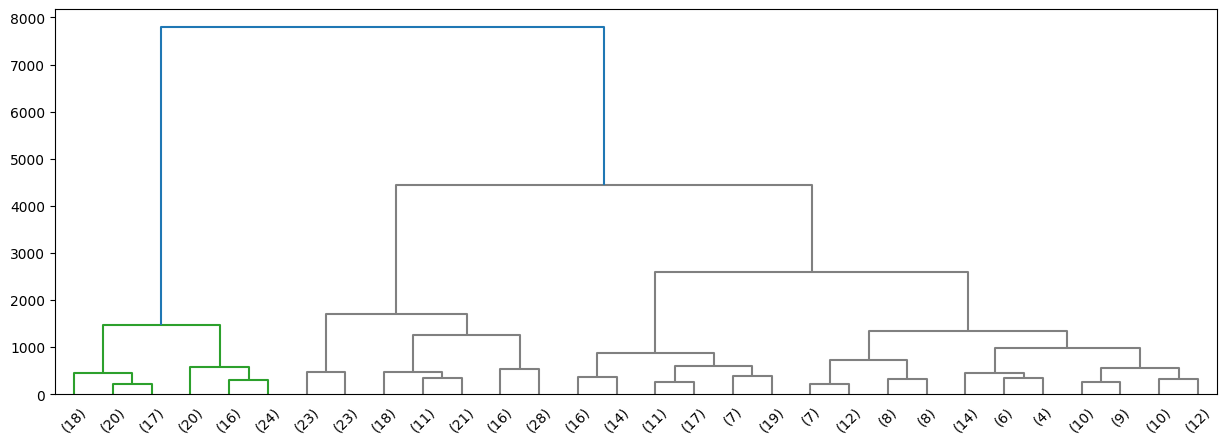

In [16]:
from scipy.cluster import hierarchy
from matplotlib import colors
import seaborn as sns

Z = hierarchy.linkage(ag.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))

# Some color customization
dark_palette = sns.color_palette()
red = colors.to_hex(dark_palette[2])
blue = colors.to_hex(dark_palette[0])

hierarchy.set_link_color_palette([red, 'gray'])

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color=blue)

In [17]:
import pandas as pd

Z_df = pd.DataFrame(Z, columns=['Cluster_1', 'Cluster_2', 'Distance', 'Num_samples_in_new_cluster'])

In [18]:
print(Z_df)

     Cluster_1  Cluster_2     Distance  Num_samples_in_new_cluster
0         65.0      129.0     1.414214                         2.0
1        113.0      155.0     1.414214                         2.0
2        314.0      343.0     1.414214                         2.0
3        405.0      413.0     1.414214                         2.0
4          8.0       72.0     2.236068                         2.0
..         ...        ...          ...                         ...
433      860.0      865.0  1467.749863                       115.0
434      861.0      870.0  1706.907130                       140.0
435      868.0      871.0  2592.886807                       184.0
436      873.0      874.0  4434.443400                       324.0
437      872.0      875.0  7787.120674                       439.0

[438 rows x 4 columns]


Interpret the result of the dendogram

A dendrogram is a type of tree diagram showing hierarchical clustering — relationships between similar sets of data. They are especially used in hierarchical clustering, which is an alternative to k-means clustering, for example. They help to illustrate the arrangement of the clusters produced by the corresponding analyses. Here's how to interpret a dendrogram:

Understanding the axes: The x-axis contains the data points or labels. The y-axis represents the distance or dissimilarity between clusters. It can represent various things, such as Euclidean distance, correlation dissimilarity, etc., depending on what distance measure you used when performing hierarchical clustering.

Height of the linkages: The vertical lines represent linkages. The height of each linkage on the y-axis shows the distance or dissimilarity between the two clusters being linked. The higher the linkage, the less similar the clusters are.

Number of clusters: You can determine an appropriate number of clusters by looking for the longest stretch of vertical line (not crossed by any extended horizontal lines), and drawing a horizontal line through it. The number of vertical lines it intersects is the optimal number of clusters.

Order of merging: The dendrogram essentially shows, at each stage of the clustering process, which clusters were merged to create a new cluster. The horizontal lines connect the clusters that were merged. You can see the order in which clusters or data points were merged by reading the dendrogram from bottom to top.

Size of clusters: The distance from the topmost point of the dendrogram to the point where a horizontal line intersects a vertical line gives the size of the cluster. The larger the distance, the larger the cluster.

Supplementary Activity:
* Choose your own dataset.
* Import the dataset 
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values(NaN), replacing missing data .
* Standardize the variables.
* Perform descriptive statistics such as mean, median and mode
* Perform data visualization 
* Use k-means clustering to identify the groups of the dataset.
* Use 1 to 10 clusters
* Determine the optimum number of clusters
* Use agglomerative clustering and visualize the dendogram
* Compare the results obtained by the K means and agglomerative clustering.

Load the dataset and check the first five rows

In [22]:
filepath1 =  '/content/drive/My Drive/Colab Notebooks/Datasets/Mall_Customers.csv'

In [23]:
import os, warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans, AgglomerativeClustering

In [24]:
cust=pd.read_csv(filepath1, sep=',')
cust.rename(columns={"Annual Income (k$)": "Annual Income", "Spending Score (1-100)": "Spending Score"}, inplace=True)
print("There are {:,} observations and {} columns in the data set.".format(cust.shape[0], cust.shape[1]))
print("There are {} missing values in the data.".format(cust.isna().sum().sum()))
cust.head()

There are 200 observations and 5 columns in the data set.
There are 0 missing values in the data.


,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [25]:
cust.drop('CustomerID', axis=1, inplace=True)
pd.DataFrame(cust.describe()).style.set_caption("Summary Statistics of Numeric Variables")

,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [26]:
cust['Gender'] = ['Women' if i == 'Female' else 'Men' for i in cust.Gender]
pd.DataFrame(cust.select_dtypes('object').describe().T).style.set_caption("Summary Statistics of Categorical Variables")

,count,unique,top,freq
Gender,200,2,Women,112


In [28]:
temp = dict(layout=go.Layout(font=dict(family="Franklin Gothic", size=12)))

In [29]:
#Correlations
corr=cust.corr()
x = corr.columns.tolist() 
y = corr.index.tolist()
z = corr.values
text = corr.values.round(2)

fig = ff.create_annotated_heatmap(z=z, x=x, y=y, annotation_text=text, colorscale='mint', 
                                  reversescale=True, showscale=True,
                                  hovertemplate="Correlation of %{x} and %{y}= %{z:.3f}")
fig.update_layout(template=temp, title="Mall Customer Correlations", yaxis_tickangle=-30)
fig.show()

In [30]:
# K-Means Clustering
clust_df = cust.copy()
clust_df['Gender'] = [1 if i == "Women" else 0 for i in clust_df.Gender]

k_means = list()
for clust in range(1,16):
    km = KMeans(n_clusters=clust, init='k-means++', random_state=21).fit(clust_df)
    k_means.append(pd.Series({'Clusters': clust, 
                              'Inertia': km.inertia_,
                              'model': km}))

# Plot results
plot_km = (pd.concat(k_means, axis=1).T
           [['Clusters','Inertia']]
           .set_index('Clusters'))

fig = px.line(plot_km, x=plot_km.index, y='Inertia', markers=True)
fig.add_vline(x=5, line_width=3, line_dash="dash", line_color="darkgrey")
fig.add_annotation(
    xref="x domain",
    yref="y",
    x=.31,
    y=75e3,
    text="Optimal Number of Clusters",
    axref="x domain",
    ayref="y",
    ax=.43,
    ay=12e4,
    arrowhead=2, 
    bordercolor="#585858",
    borderpad=4, 
    bgcolor='white',
    font=dict(size=14)
)
fig.update_traces(line_color='#518C89')
fig.update_layout(template=temp, title="K-Means Clustering Elbow Curve", 
                  xaxis=dict(tickmode = 'linear', showline=True), yaxis=dict(showline=True), width=700)
fig.show()

In [31]:
# K-Means with 5 clusters
km = KMeans(n_clusters=5, random_state=21)
km_pred = km.fit_predict(clust_df)
plot_km=clust_df.copy()
plot_km['K-Means Cluster'] = km_pred
plot_km=plot_km.sort_values(by='K-Means Cluster')
plot_km['K-Means Cluster'] = plot_km['K-Means Cluster'].astype(str)

# Plot of clusters
fig = px.scatter(plot_km, x="Spending Score", y="Annual Income", color="K-Means Cluster", 
                 color_discrete_sequence=px.colors.qualitative.Prism)
fig.update_traces(marker=dict(size=11, opacity=0.75, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="K-Means Cluster Profiles,<br>Customer Spending vs. Income", 
                  width=700, legend_title='Cluster',
                  xaxis=dict(title='Spending Score', showline=True, zeroline=False), 
                  yaxis=dict(title='Income, $', ticksuffix='k', showline=True))
fig.show()

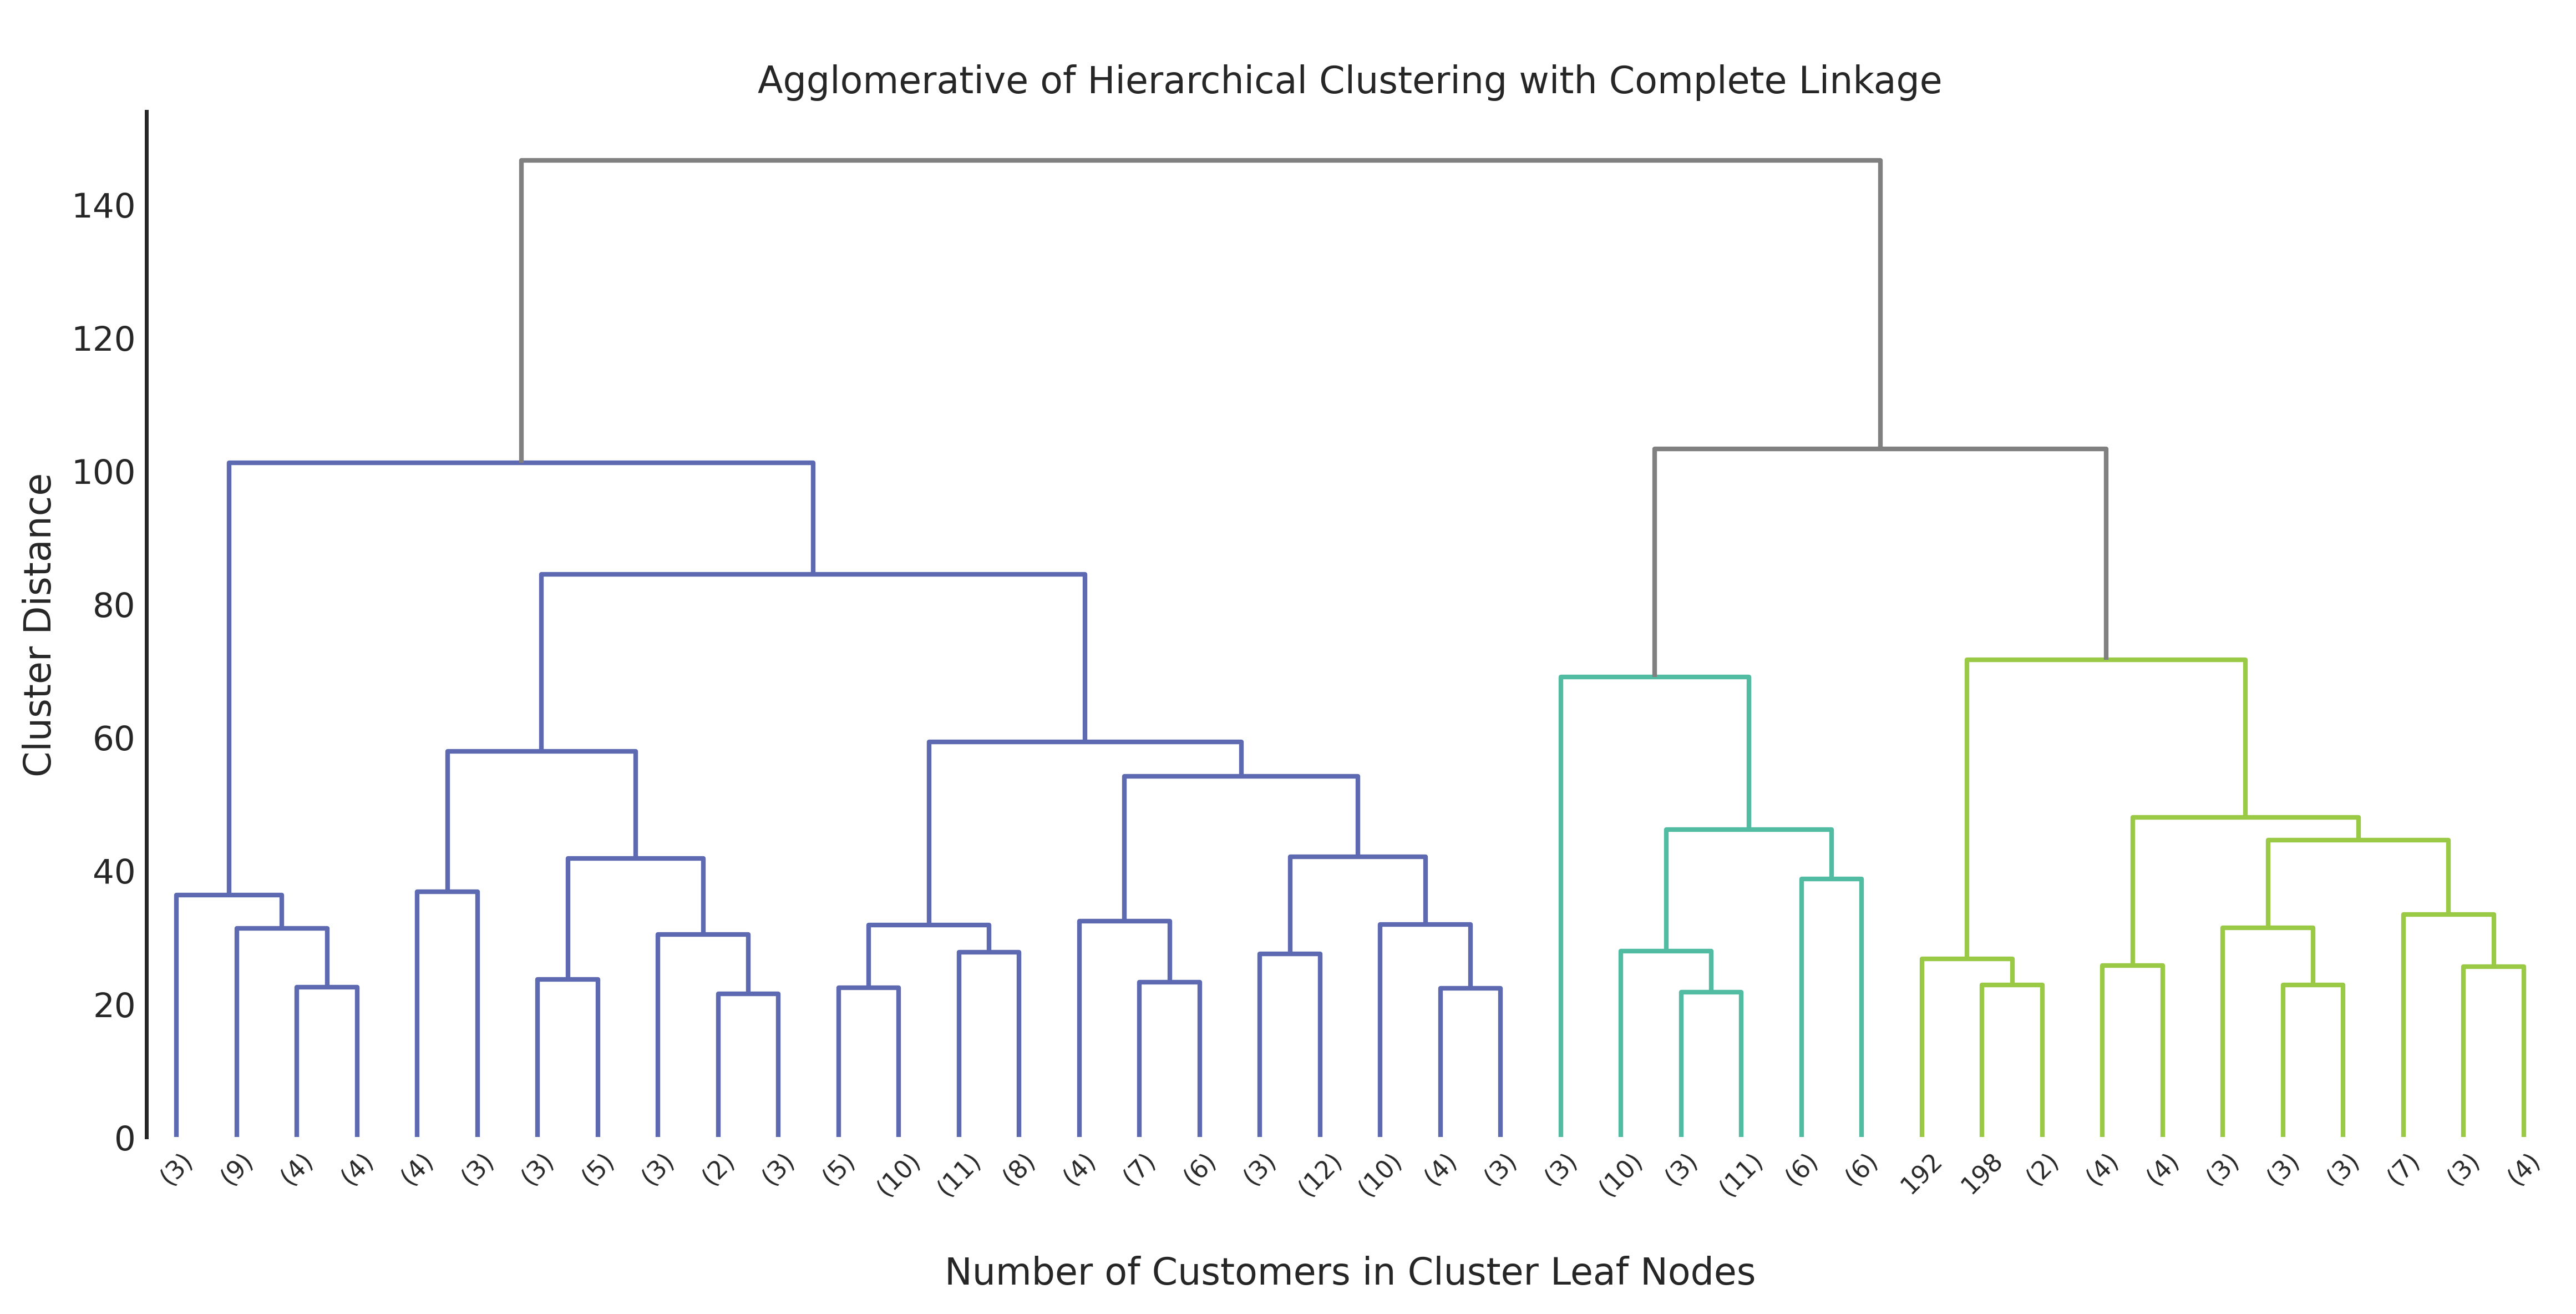

In [35]:
sns.set(rc={'figure.dpi':400})
sns.set_context('notebook')
sns.set_style('ticks')

Z = hierarchy.linkage(clust_df, method='complete', metric='euclidean')
fig, ax = plt.subplots(figsize=(14,6))
hierarchy.set_link_color_palette(['#5d69b1', '#52bca3', '#99c945'])
den = hierarchy.dendrogram(Z, orientation='top', color_threshold=102,
                           p=40, truncate_mode='lastp',
                           show_leaf_counts=True, ax=ax,
                           above_threshold_color='grey')
#ax.axhline(101, color='grey', linestyle='--')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.tick_params(axis=u'both', which=u'both',length=0)
ax.set_xlabel('\nNumber of Customers in Cluster Leaf Nodes')
ax.set_ylabel('Cluster Distance')
ax.set_title('\nAgglomerative of Hierarchical Clustering with Complete Linkage')
fig.show()

In [36]:
#agglomerative clustering
hc = AgglomerativeClustering(3, affinity='euclidean', linkage='complete', compute_full_tree=False)
hc_pred = hc.fit_predict(clust_df)
plot_hc=clust_df.copy()
plot_hc["Hierarchical Cluster"]=hc_pred
plot_hc=plot_hc.sort_values(by='Hierarchical Cluster')
plot_hc['Hierarchical Cluster'] = plot_hc['Hierarchical Cluster'].astype(str)

# Plot of clusters                                               
fig = px.scatter(plot_hc, x="Spending Score", y="Annual Income", color="Hierarchical Cluster",
                 color_discrete_sequence=px.colors.qualitative.Vivid[1:])
fig.update_traces(marker=dict(size=11, opacity=0.75, line=dict(width=1, color='#F7F7F7')))
fig.update_layout(template=temp, title="Agglomerative Cluster Profiles,<br>Customer Spending vs. Income", 
                  width=700, legend_title = 'Cluster',
                  xaxis=dict(title='Spending Score',showline=True, zeroline=False), 
                  yaxis=dict(title='Income, $',ticksuffix='k',showline=True))
fig.show()

#### Conclusion

The K-Means model segments the data into distinct clusters based on customer's spending and income. Cluster 0 in the center of the graph consists of customers with average spending scores, between 35-61, and incomes between 40,000 and 71,000. The two clusters on the left, Clusters 1 and 3, both identify customers with lower spending scores that are below 40 and subdivides the groups according to their income. In contrast, Clusters 2 and 4 consist of customers with higher spending scores, above 61, and are further partitioned based on their income.

Hierarchical clustering tends to put more weight on customer's income in creating the clusters. The largest cluster, Cluster 0, consists of customers who have an annual income of around 70,000 or less and spending scores ranging from 3 to 99, while customers in Clusters 1 and 2 have incomes above 70,000 and are further subdivided into smaller segments based on their spending score.

K-Means model created the most distinguished clusters.The Hierarchical Clustering model defined the fewest number of clusters overall, with more emphasis placed on customer's income.
